# Homework6.ssonnack.ipynb

## Purpose

This notebook is to take a look at the meme stock trend.  I look at several different data points to see if google searches are related to stock changes.

# Setup the imports

In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
from pytrends.request import TrendReq
import numpy as np
import pandas as pd
import seaborn as sea
#pip install plotly==5.1.0
import plotly.express as px

# Set the trend

In [2]:
pytrends = TrendReq(hl='en-US', tz=360)

# Setup Keyword Search, and pull the search results using pytrends for April 1 - June 30

In [3]:
keywords = ["AMC"] 
pytrends.build_payload(keywords, timeframe='2021-04-01 2021-06-30', geo='US')

# Show interest over time

In [4]:
amcSearchResults = pytrends.interest_over_time()
amcSearchResults

,AMC,isPartial
date,,
2021-04-01,14,False
2021-04-02,13,False
2021-04-03,12,False
2021-04-04,10,False
2021-04-05,11,False
...,...,...
2021-06-26,22,False
2021-06-27,18,False
2021-06-28,25,False


In [5]:
amcSearchResults = amcSearchResults.rename(columns={'AMC': 'Search Interest'})
amcSearchResults

,Search Interest,isPartial
date,,
2021-04-01,14,False
2021-04-02,13,False
2021-04-03,12,False
2021-04-04,10,False
2021-04-05,11,False
...,...,...
2021-06-26,22,False
2021-06-27,18,False
2021-06-28,25,False


# Use Yahoo Finance to pull Stock Data from April 1 - June 30

In [6]:
amcStockInfo = yf.download("AMC", start="2021-04-01", end="2021-06-30", interval="1d")
amcStockInfo.shape

[*********************100%***********************]  1 of 1 completed


(62, 6)

# Show the stock data

In [7]:
amcStockInfo

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,10.230000,10.260000,9.150000,9.360000,9.360000,77473900
2021-04-05,10.100000,11.250000,9.720000,10.610000,10.610000,96082300
2021-04-06,10.400000,10.500000,10.000000,10.200000,10.200000,44067000
2021-04-07,10.070000,10.180000,9.850000,9.850000,9.850000,28804300
2021-04-08,10.010000,10.010000,9.500000,9.790000,9.790000,33408700
...,...,...,...,...,...,...
2021-06-23,57.040001,61.099998,56.799999,58.299999,58.299999,116291800
2021-06-24,57.980000,58.759998,55.660000,56.700001,56.700001,80351200
2021-06-25,55.750000,56.290001,52.970001,54.060001,54.060001,77596900


# Add a Column Representing Amount Lost or Gained

In [8]:
amcStockInfo["Amount Changed"] = amcStockInfo["Open"] - amcStockInfo["Close"]

# Merge the Two Tables

In [9]:
amcMergedDataFrame = amcSearchResults.merge(amcStockInfo, how='inner', left_index=True, right_index=True)
amcMergedDataFrame

,Search Interest,isPartial,Open,High,Low,Close,Adj Close,Volume,Amount Changed
2021-04-01,14,False,10.230000,10.260000,9.150000,9.360000,9.360000,77473900,0.870000
2021-04-05,11,False,10.100000,11.250000,9.720000,10.610000,10.610000,96082300,-0.509999
2021-04-06,11,False,10.400000,10.500000,10.000000,10.200000,10.200000,44067000,0.200000
2021-04-07,10,False,10.070000,10.180000,9.850000,9.850000,9.850000,28804300,0.219999
2021-04-08,9,False,10.010000,10.010000,9.500000,9.790000,9.790000,33408700,0.220000
...,...,...,...,...,...,...,...,...,...
2021-06-23,23,False,57.040001,61.099998,56.799999,58.299999,58.299999,116291800,-1.259998
2021-06-24,24,False,57.980000,58.759998,55.660000,56.700001,56.700001,80351200,1.279999
2021-06-25,28,False,55.750000,56.290001,52.970001,54.060001,54.060001,77596900,1.689999
2021-06-28,25,False,55.099998,59.360001,54.330002,58.110001,58.110001,99310200,-3.010002


# Create a Filtered Table to Use for MatPlotLib

In [10]:
amcFiltered = amcMergedDataFrame[['Search Interest', 'Close']]

In [11]:
amcFiltered.head()
amcFiltered

,Search Interest,Close
2021-04-01,14,9.360000
2021-04-05,11,10.610000
2021-04-06,11,10.200000
2021-04-07,10,9.850000
2021-04-08,9,9.790000
...,...,...
2021-06-23,23,58.299999
2021-06-24,24,56.700001
2021-06-25,28,54.060001
2021-06-28,25,58.110001


# Create MatPlotLib focused on the price of stock and the level of search interest.  100 being extremely high, 0 being very little.

Text(0, 0.5, 'Search Interest')

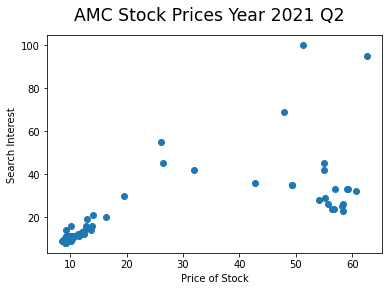

In [17]:

plt.scatter(amcFiltered["Close"].values, amcFiltered["Search Interest"].values,)

plt.suptitle('AMC Stock Prices Year 2021 Q2', ha='center', fontsize='xx-large')
plt.xlabel('Price of Stock')
plt.ylabel('Search Interest')

# Start creating SeaBorne DataFrame 

In [13]:
amcFilteredForSeaborne = amcMergedDataFrame[['Search Interest', 'Amount Changed']]
amcFilteredForSeaborne

,Search Interest,Amount Changed
2021-04-01,14,0.870000
2021-04-05,11,-0.509999
2021-04-06,11,0.200000
2021-04-07,10,0.219999
2021-04-08,9,0.220000
...,...,...
2021-06-23,23,-1.259998
2021-06-24,24,1.279999
2021-06-25,28,1.689999
2021-06-28,25,-3.010002


# Create SeaBorne Chart showing Amount changed based on search interest.

<AxesSubplot:xlabel='Amount Changed', ylabel='Search Interest'>

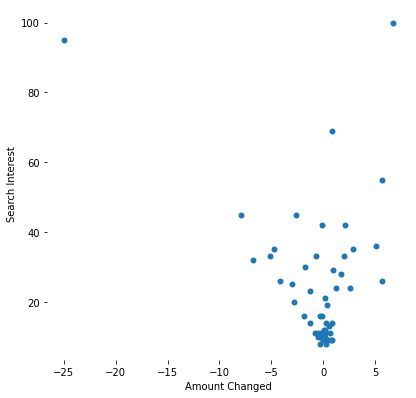

In [14]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sea.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sea.scatterplot(x="Amount Changed", y="Search Interest",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=amcFilteredForSeaborne, ax=ax)

# Plotly, prepare the table

In [15]:
amcFilteredPlotLy = amcMergedDataFrame[['Close']]

# Plot the graph

In [16]:
fig = px.line(amcFilteredPlotLy, title='Stock Price During The Period',
labels={
                     "value": "Price",
                     "index": "Date",
                     "variable": "Closing Price"
                 },)
fig.show()